# Name: Sai Sriharsha Griddaluru
## Email: sgridda@clemson.edu
## CUID: C15358926

# HW 1: TASK 3: Network Fit with Random Labels

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
transform = transforms.ToTensor()

In [4]:
train_data_set = datasets.MNIST(root='deep-learning/hw-1/dataset-2', train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root='deep-learning/hw-1/dataset-2', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 33376291.27it/s]


Extracting deep-learning/hw-1/dataset-2/MNIST/raw/train-images-idx3-ubyte.gz to deep-learning/hw-1/dataset-2/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 3075446.68it/s]

Extracting deep-learning/hw-1/dataset-2/MNIST/raw/train-labels-idx1-ubyte.gz to deep-learning/hw-1/dataset-2/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2861098.99it/s]


Extracting deep-learning/hw-1/dataset-2/MNIST/raw/t10k-images-idx3-ubyte.gz to deep-learning/hw-1/dataset-2/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10490379.28it/s]


Extracting deep-learning/hw-1/dataset-2/MNIST/raw/t10k-labels-idx1-ubyte.gz to deep-learning/hw-1/dataset-2/MNIST/raw



In [5]:
print(len(train_data_set))
print(test_data_set)

60000
Dataset MNIST
    Number of datapoints: 10000
    Root location: deep-learning/hw-1/dataset-2
    Split: Test
    StandardTransform
Transform: ToTensor()


In [6]:
# Randomly shuffling labels for training and testing sets
random_train_labels = torch.tensor(np.random.randint(0, 10, (len(train_data_set),)))
train_data_set.targets = random_train_labels
random_test_labels = torch.tensor(np.random.randint(0, 10, (len(test_data_set),)))
test_data_set.targets = random_test_labels

In [7]:
# Data loaders for training and testing
train_loader = DataLoader(train_data_set, batch_size=50, shuffle=True)
test_loader = DataLoader(test_data_set, batch_size=50, shuffle=True)

In [9]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_size=784, hidden1=120, hidden2=120, hidden3=16, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.fc_out = nn.Linear(hidden3, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc_out(x)
        return x

model = FeedForwardNN()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [10]:
epochs = 30
train_losses = []
test_losses = []

for epoch in range(epochs):
    for batch_idx, (X_train, y_train) in enumerate(train_loader):
        y_pred = model(X_train.view(50, -1))
        train_loss = criterion(y_pred, y_train)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
    train_losses.append(train_loss.item())
    
    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test.view(50, -1))
    
    test_loss = criterion(y_val, y_test)
    test_losses.append(test_loss.item())

train_losses = torch.tensor(train_losses)
test_losses = torch.tensor(test_losses)

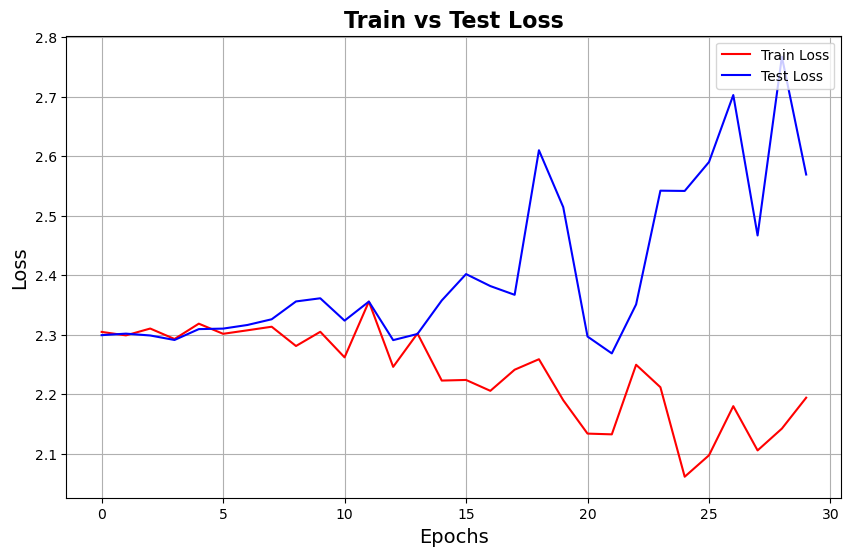

In [11]:
# Visualizing losses for the MNIST dataset
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, 'r', label='Train Loss')
plt.plot(range(epochs), test_losses, 'b', label='Test Loss')
plt.title("Train vs Test Loss", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend(loc="upper right")
plt.grid(True)
plt.show()